Voici un jeu de données extrait d'observations de l'institut de Bergen.

Votre mission "estimer l'âge des poissons à partir des paramètres fournis" afin de mieux réguler les stocks de Poisson.

Contraintes :

Utiliser les 3 modèles vus en cours (régression, knn/kppv, arbre de décision) pour estimer l'âge des poissons.
Optimiser ses modèles en analysant les différentes versions et paramétrisations possibles.
User des visualisations pour votre analyse et décrivez votre démarche et résultats
Déposer ce jour vos premiers résultats
Déposer votre solution sur kaggle avant 2 semaines. (lien fourni en début de semaine)
Donner l'adresse de votre git pour suivre votre évolution après cette séance.

### Importation des bibliotheque

In [544]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier


In [545]:
df = pd.read_csv('train.csv')

In [546]:
df.head()

id   weight  length  liverweight  gonadweight   age
0   1  20700.0   132.0        0.528        2.300  14.0
1   2   1308.0    54.0        0.082        0.002   5.0
2   3   2730.0    72.0        0.046        0.039   7.0
3   4   3300.0    76.0        0.098        0.020   7.0
4   5   1155.0    51.0        0.035        0.002   4.0

In [547]:
df.columns

Index(['id', 'weight', 'length', 'liverweight', 'gonadweight', 'age'], dtype='object')

In [548]:
df.info()
df.astype({'age': 'int32'}).dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           521 non-null    int64  
 1   weight       521 non-null    float64
 2   length       521 non-null    float64
 3   liverweight  521 non-null    float64
 4   gonadweight  521 non-null    float64
 5   age          521 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 24.5 KB


id               int64
weight         float64
length         float64
liverweight    float64
gonadweight    float64
age              int32
dtype: object

In [549]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           521 non-null    int64  
 1   weight       521 non-null    float64
 2   length       521 non-null    float64
 3   liverweight  521 non-null    float64
 4   gonadweight  521 non-null    float64
 5   age          521 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 24.5 KB


In [550]:
df = df.astype({"age": int})

df.dtypes

id               int64
weight         float64
length         float64
liverweight    float64
gonadweight    float64
age              int64
dtype: object

In [551]:
df.head()

id   weight  length  liverweight  gonadweight  age
0   1  20700.0   132.0        0.528        2.300   14
1   2   1308.0    54.0        0.082        0.002    5
2   3   2730.0    72.0        0.046        0.039    7
3   4   3300.0    76.0        0.098        0.020    7
4   5   1155.0    51.0        0.035        0.002    4

In [552]:
#Correlation:
print('Covariance:')
df.drop(columns='age').cov()

Covariance:


id        weight        length  liverweight  \
id           22663.500000 -3.840161e+04   -150.254808    -2.180562   
weight      -38401.611538  1.813093e+07  77217.933067  1374.950695   
length        -150.254808  7.721793e+04    389.481722     5.729722   
liverweight     -2.180562  1.374951e+03      5.729722     0.137543   
gonadweight     -3.058487  2.948152e+03     10.757250     0.242431   

             gonadweight  
id             -3.058487  
weight       2948.152409  
length         10.757250  
liverweight     0.242431  
gonadweight     0.678708

In [553]:
df.groupby('age').mean()

id        weight      length  liverweight  gonadweight
age                                                                
3    283.125000    696.750000   42.375000     0.020250     0.002625
4    244.476190    987.428571   47.559524     0.033381     0.009976
5    267.929825   1811.122807   57.210526     0.074544     0.037386
6    291.952941   2751.058824   65.752941     0.144859     0.125318
7    262.471264   3311.114943   72.022989     0.184989     0.150989
8    267.362319   4369.884058   78.695652     0.262232     0.266420
9    216.535714   6286.285714   87.464286     0.408232     0.516732
10   286.038462   8305.769231   97.615385     0.534385     0.726038
11   269.461538  10700.769231  101.884615     0.683808     1.322846
12   262.684211  11407.973684  103.605263     0.887658     1.562342
13   201.083333  13867.083333  107.250000     1.073167     2.024667
14   206.400000  14238.000000  110.000000     0.988300     2.341000
15   296.333333  12623.333333  105.333333     1.239333     2.230667
16    80.000000  12985.000000  110.500000     0.657500     1.530000

In [554]:
df.shape

(521, 6)

In [555]:
df.isna().sum()

id             0
weight         0
length         0
liverweight    0
gonadweight    0
age            0
dtype: int64

In [556]:
df.dtypes.value_counts()

float64    4
int64      2
dtype: int64

### L'analyse exploratoire des données

Effectuons l'exploration de base sur le jeu de données et découvrons les relations entre les différentes colonnes / fonctionnalités avec Age

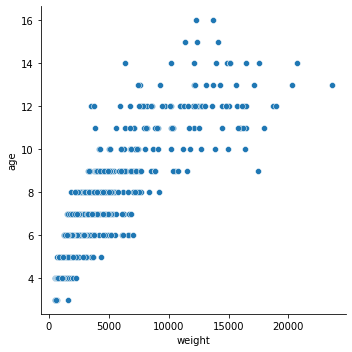

In [557]:
sns.relplot(x = "weight", y = "age", data = df)

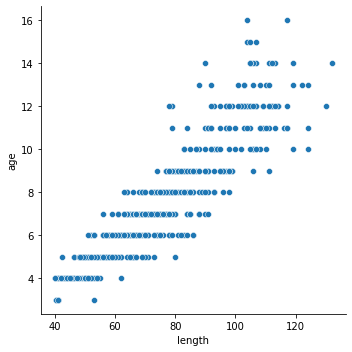

In [558]:
sns.relplot(x = "length", y = "age", data = df)

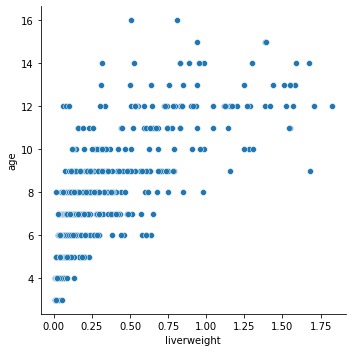

In [559]:
sns.relplot(x = "liverweight", y = "age", data = df)

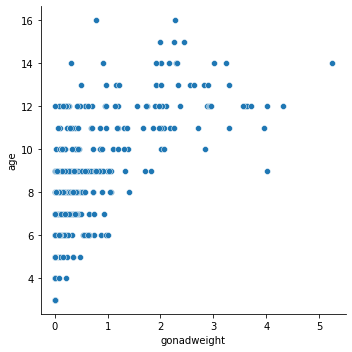

In [560]:
sns.relplot(x = "gonadweight", y = "age", data = df)

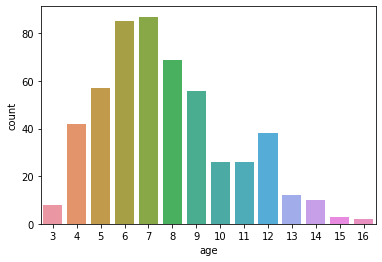

In [561]:
sns.countplot(x = "age", data = df)

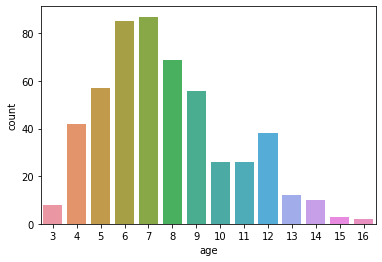

In [562]:
sns.countplot(x = "age", data = df)

In [563]:
from sklearn.model_selection import train_test_split


Analyse

In [564]:
X =df[['weight','length','liverweight','gonadweight']]

In [565]:
Y = df['age']

In [566]:
from sklearn.base import TransformerMixin
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [567]:
X_train.shape

(364, 4)

In [568]:
X_test.shape

(157, 4)

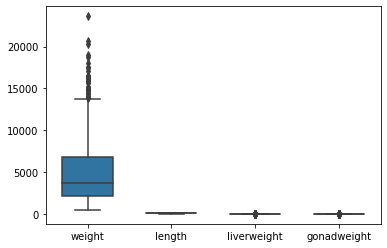

In [569]:
sns.boxplot(data=df[["weight","length","liverweight","gonadweight"]],width=0.6) # Les diagrammes en boîte montrent visuellement la distribution des données numériques et l'asymétrie en affichant les quartiles et les moyennes des données

#### KPP algorithme

In [570]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score


In [571]:
from sklearn import neighbors
from math import sqrt
rmse_val = [] #stocker les valeurs rmse pour different k
r2 = []
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #faire des prédictions sur l'ensemble de test
    error = sqrt(mean_squared_error(y_test,pred)) #calcule moyenne quadratique
    #r2s = r2_score(y_test,pred)
    #r2s.append(r2)
    rmse_val.append(error) #stocker les valeurs rmse
    print()
    print('valeur rmse pour k= ' , K , 'est:', error)
    print("taux de reconnaissance en apprentissage Knn: ",model.score(X_train, y_train))
    print("taux de reconnaissance en généralisation:", model.score(X_test, y_test))
   
    #print('valeur r2 pour k= ' , r2 , 'est:', r2)


valeur rmse pour k=  1 est: 1.557803451131332
taux de reconnaissance en apprentissage Knn:  1.0
taux de reconnaissance en généralisation: 0.6804647435897435

valeur rmse pour k=  2 est: 1.4354475100609312
taux de reconnaissance en apprentissage Knn:  0.8995547704414738
taux de reconnaissance en généralisation: 0.7286885683760684

valeur rmse pour k=  3 est: 1.3507356911288955
taux de reconnaissance en apprentissage Knn:  0.8639976669786743
taux de reconnaissance en généralisation: 0.7597661443494776

valeur rmse pour k=  4 est: 1.309719909766289
taux de reconnaissance en apprentissage Knn:  0.8429736050274474
taux de reconnaissance en généralisation: 0.774134281517094

valeur rmse pour k=  5 est: 1.3055491559976264
taux de reconnaissance en apprentissage Knn:  0.8308466567387098
taux de reconnaissance en généralisation: 0.7755705128205128

valeur rmse pour k=  6 est: 1.3373744492666626
taux de reconnaissance en apprentissage Knn:  0.818560523901095
taux de reconnaissance en généralisa

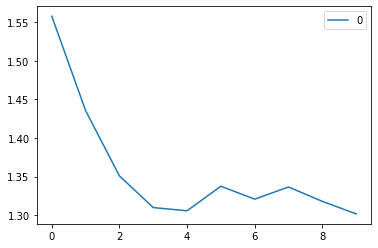

In [572]:
curve = pd.DataFrame(rmse_val) 
curve.plot()

###Remarque :
Avec l'algorithme de Knn, on constate que  la taux de reconnaissance en apprentissage est tres faible d'apres notre analyse
on analysant k allant de 1 a 3


#### Decision Tree 

In [573]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor()
regr.fit(X_train,y_train)
predictions = regr.predict(X_test)


In [574]:
print('valeur rmse est', sqrt(mean_squared_error(y_test,predictions)))
print("taux de reconnaissance en apprentissage: ",regr.score(X_train, y_train))
print("taux de reconnaissance en généralisation:", regr.score(X_test, y_test))



valeur rmse est 1.5981677406919885
taux de reconnaissance en apprentissage:  1.0
taux de reconnaissance en généralisation: 0.6636912393162393


### Algorithme de regression lineaire

In [575]:

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import math 
from sklearn.model_selection  import train_test_split
from sklearn.metrics import  make_scorer, mean_squared_error

In [576]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.22,random_state=101)
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print("taux de reconnaissance en apprentissage: ",lr.score(X_train, y_train))
print("taux de reconnaissance en généralisation:", lr.score(X_test, y_test))

 
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse


taux de reconnaissance en apprentissage:  0.8176302728191669
taux de reconnaissance en généralisation: 0.8125072367585082


1.0739231222795962

On choisi le modèle de la régression lineaire qui présente le risque d'erreur le moins élévé et un taux de reconnaissance le plus élévé

#### lecture des dossiers de test et de soumission

In [577]:
test = pd.read_csv('test.csv')
test
id = test.id
test = test.drop(axis=1, columns='id')

In [578]:
age_pred = lr.predict(test)
age_pred = age_pred.round(0)
type(age_pred)
age_pred= age_pred.astype(int)

In [579]:
age_pred = age_pred.tolist()



In [580]:
import pandas as pd


In [581]:
id = id.tolist()

In [582]:
type(id)

list

In [583]:
d = {'id':id, 'Predicted': age_pred}

In [584]:

sub = pd.DataFrame(data=d)


In [585]:
sub.head()


id  Predicted
0  523          4
1  524          6
2  525          4
3  526          7
4  527          9

In [586]:
sub.to_csv('test1.csv' ,index= False)
sub.head(5)

id  Predicted
0  523          4
1  524          6
2  525          4
3  526          7
4  527          9

In [587]:
test['age_predit'] = age_pred 

In [588]:
test.head()

weight  length  liverweight  gonadweight  age_predit
0   700.0    45.0        0.022        0.003           4
1  2370.0    65.0        0.186        0.180           6
2  1120.0    49.5        0.021        0.070           4
3  2246.0    67.0        0.072        0.016           7
4  4885.0    86.0        0.314        0.386           9